# Importing Libraries

In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                            confusion_matrix, roc_auc_score, roc_curve)
from sklearn.pipeline import make_pipeline

# Load and prepare data
df = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')

# Separate features and target
X = df.drop('Class', axis=1)
y = df['Class']

# Split data - maintaining class imbalance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42, 
                                                    stratify=y)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression Confusion Matrix and ROC

Logistic Regression Performance:
Accuracy: 0.9755
Precision: 0.0610
Recall: 0.9184
ROC-AUC: 0.9721


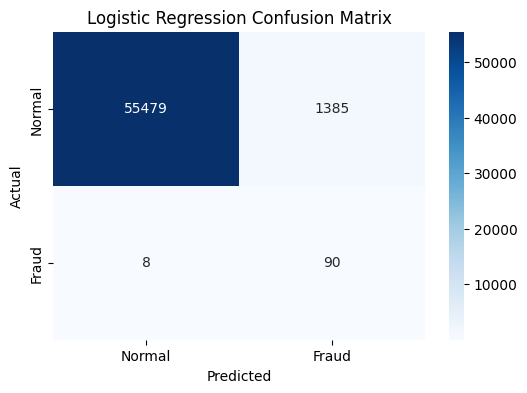

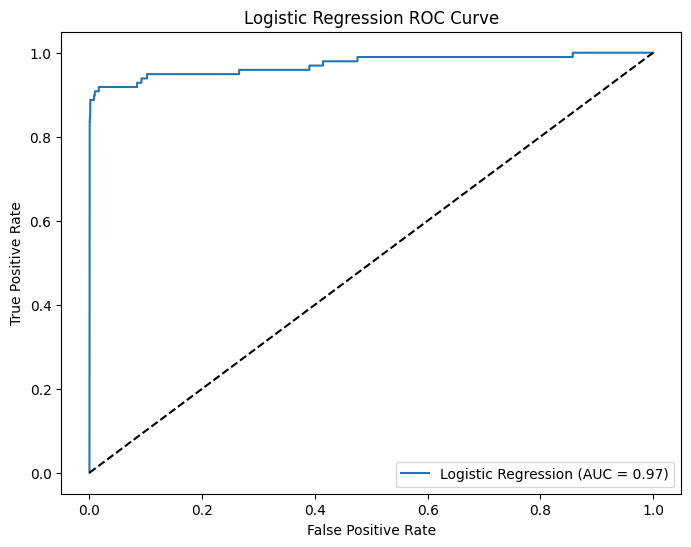

In [12]:

from sklearn.metrics import roc_curve, roc_auc_score

# Initialize and train Logistic Regression
lr = LogisticRegression(class_weight='balanced', 
                       max_iter=1000, 
                       random_state=42)
lr_pipe = make_pipeline(StandardScaler(), lr)
lr_pipe.fit(X_train, y_train)

# Predictions
y_pred_lr = lr_pipe.predict(X_test)
y_prob_lr = lr_pipe.predict_proba(X_test)[:, 1]  # Probability scores for ROC

# Evaluation Metrics
print("Logistic Regression Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_lr):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_lr):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_prob_lr):.4f}")

# Confusion Matrix
plt.figure(figsize=(6, 4))
cm_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Normal', 'Fraud'],
            yticklabels=['Normal', 'Fraud'])
plt.title('Logistic Regression Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# ROC Curve
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, 
         label=f'Logistic Regression (AUC = {roc_auc_score(y_test, y_prob_lr):.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.legend()
plt.show()

# Decision Tree with Confusion Matrix and ROC


Decision Tree Performance:
Accuracy: 0.9694
Precision: 0.0474
Recall: 0.8776
ROC-AUC: 0.9166


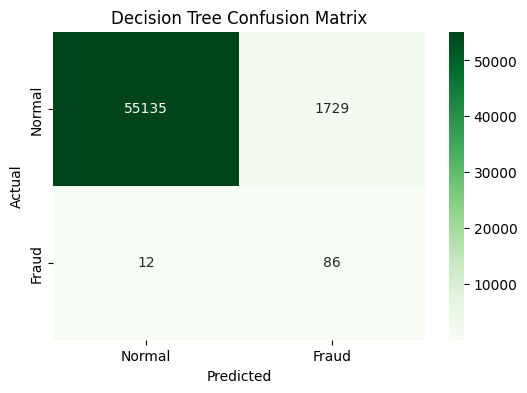

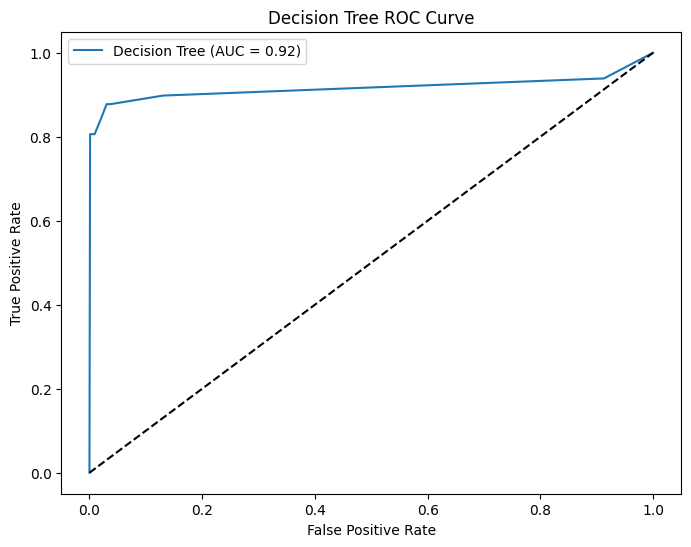

In [13]:
# Initialize and train Decision Tree
dt = DecisionTreeClassifier(class_weight='balanced', 
                           max_depth=5,  # Prevents overfitting
                           random_state=42)
dt.fit(X_train, y_train)  # Trees don't need scaling

# Predictions
y_pred_dt = dt.predict(X_test)
y_prob_dt = dt.predict_proba(X_test)[:, 1]  # Probability scores

# Evaluation Metrics
print("\nDecision Tree Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_dt):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_dt):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_prob_dt):.4f}")

# Confusion Matrix
plt.figure(figsize=(6, 4))
cm_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Normal', 'Fraud'],
            yticklabels=['Normal', 'Fraud'])
plt.title('Decision Tree Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# ROC Curve
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, 
         label=f'Decision Tree (AUC = {roc_auc_score(y_test, y_prob_dt):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC Curve')
plt.legend()
plt.show()

# K-Nearest Neighbors with Confusion Matrix and ROC

K-Nearest Neighbors (KNN) Performance:
Accuracy: 0.9995
Precision: 0.9286
Recall: 0.7959
ROC-AUC: 0.9437


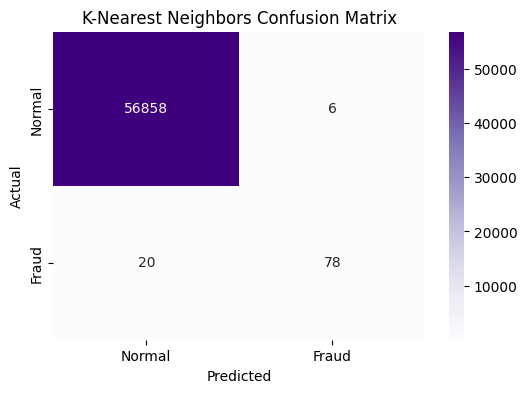

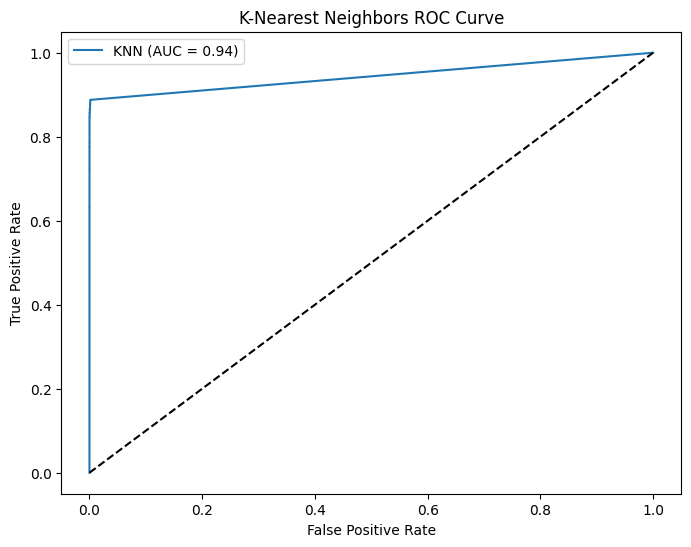

In [11]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                            confusion_matrix, roc_auc_score, roc_curve)
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize and train KNN model
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')  # Distance weighting for imbalanced data
knn_pipe = make_pipeline(StandardScaler(), knn)  # KNN requires feature scaling
knn_pipe.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn_pipe.predict(X_test)
y_prob_knn = knn_pipe.predict_proba(X_test)[:, 1]  # Probabilities for ROC

# Evaluate performance
print("K-Nearest Neighbors (KNN) Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_knn):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_knn):.4f}") 
print(f"ROC-AUC: {roc_auc_score(y_test, y_prob_knn):.4f}")

# Confusion Matrix
plt.figure(figsize=(6, 4))
cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Purples', 
            xticklabels=['Normal', 'Fraud'],
            yticklabels=['Normal', 'Fraud'])
plt.title('K-Nearest Neighbors Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# ROC Curve
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob_knn)
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {roc_auc_score(y_test, y_prob_knn):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('K-Nearest Neighbors ROC Curve')
plt.legend()
plt.show()

# Naive Bayes with Confusion Matrix and ROC


Naive Bayes Performance:
Accuracy: 0.9764
Precision: 0.0588
Recall: 0.8469
ROC-AUC: 0.9632


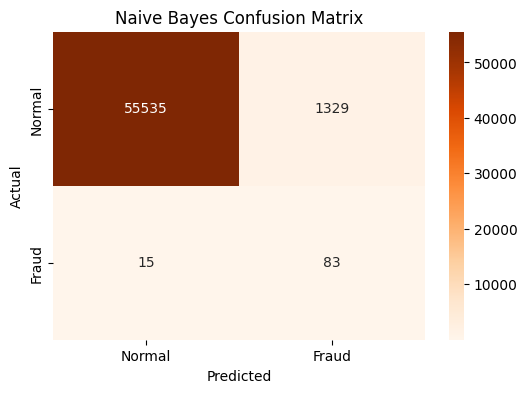

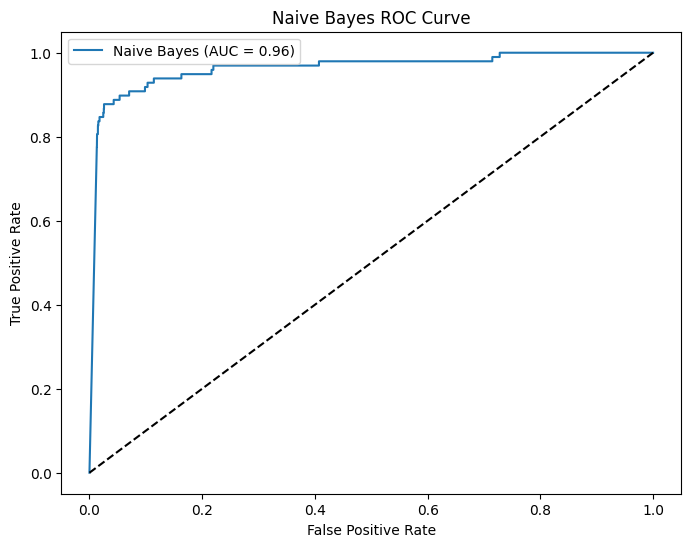

In [10]:

from sklearn.naive_bayes import GaussianNB

# Initialize and train Naive Bayes model
nb = GaussianNB()
nb_pipe = make_pipeline(StandardScaler(), nb)  # Scaling helps NB with this data
nb_pipe.fit(X_train, y_train)

# Make predictions
y_pred_nb = nb_pipe.predict(X_test)
y_prob_nb = nb_pipe.predict_proba(X_test)[:, 1]  # Probabilities for ROC

# Evaluate performance
print("\nNaive Bayes Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_nb):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_nb):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_nb):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_prob_nb):.4f}")

# Confusion Matrix
plt.figure(figsize=(6, 4))
cm_nb = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Normal', 'Fraud'],
            yticklabels=['Normal', 'Fraud'])
plt.title('Naive Bayes Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# ROC Curve
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_prob_nb)
plt.figure(figsize=(8, 6))
plt.plot(fpr_nb, tpr_nb, label=f'Naive Bayes (AUC = {roc_auc_score(y_test, y_prob_nb):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Naive Bayes ROC Curve')
plt.legend()
plt.show()

# Comparison of ROC of all the models


Model Comparison:


,Model,Accuracy,Precision,Recall,ROC-AUC
2,Logistic Regression,0.975545,0.061017,0.918367,0.972088
1,Naive Bayes,0.976405,0.058782,0.846939,0.963248
0,KNN,0.999544,0.918605,0.806122,0.943743
3,Decision Tree,0.998929,0.676190,0.724490,0.861946


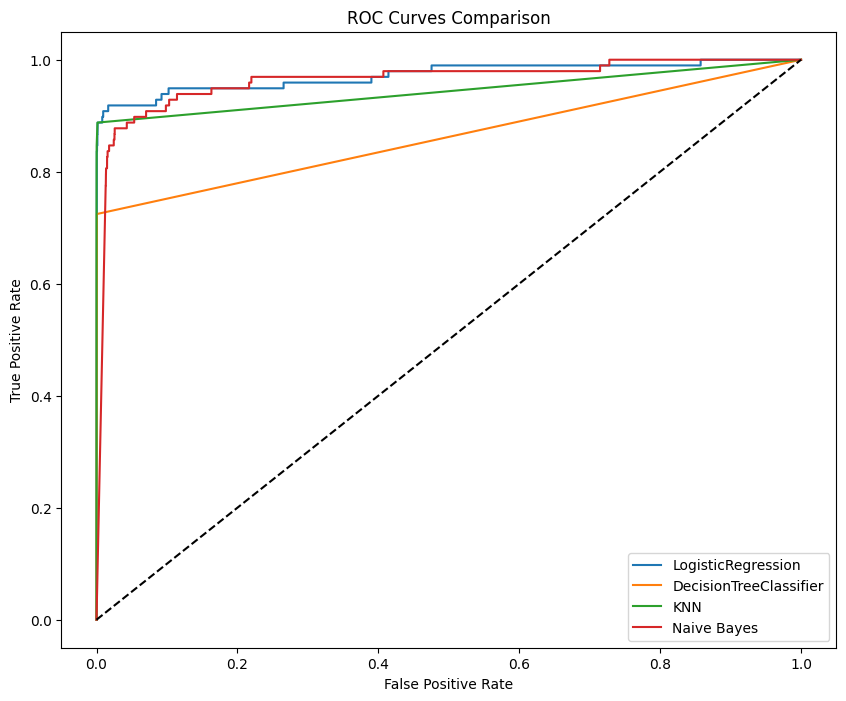

In [6]:

models = {
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB()
}

# Train and evaluate all models
results = []
for name, model in models.items():
    if name != 'Decision Tree':  # Already done
        pipe = make_pipeline(StandardScaler(), model)
        pipe.fit(X_train, y_train)
        y_pred = pipe.predict(X_test)
        y_prob = pipe.predict_proba(X_test)[:, 1]
        
        results.append({
            'Model': name,
            'Accuracy': accuracy_score(y_test, y_pred),
            'Precision': precision_score(y_test, y_pred),
            'Recall': recall_score(y_test, y_pred),
            'ROC-AUC': roc_auc_score(y_test, y_prob)
        })

# Add previous models to results
results.extend([
    {
        'Model': 'Logistic Regression',
        'Accuracy': accuracy_score(y_test, y_pred_lr),
        'Precision': precision_score(y_test, y_pred_lr),
        'Recall': recall_score(y_test, y_pred_lr),
        'ROC-AUC': roc_auc_score(y_test, y_prob_lr)
    },
    {
        'Model': 'Decision Tree',
        'Accuracy': accuracy_score(y_test, y_pred_dt),
        'Precision': precision_score(y_test, y_pred_dt),
        'Recall': recall_score(y_test, y_pred_dt),
        'ROC-AUC': roc_auc_score(y_test, y_prob_dt)
    }
])

# Create comparison table
results_df = pd.DataFrame(results)
print("\nModel Comparison:")
display(results_df.sort_values('Recall', ascending=False))

# ROC Curve for all models
plt.figure(figsize=(10, 8))

# Plot ROC for each model
for model in [lr, dt]:
    y_prob = model.predict_proba(X_test_scaled if model == lr else X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f'{model.__class__.__name__}')

for name, model in models.items():
    pipe = make_pipeline(StandardScaler(), model)
    pipe.fit(X_train, y_train)
    y_prob = pipe.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=name)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison')
plt.legend()
plt.show()

# Model Comparison Insights 

### **Logistic Regression**
- Balanced performance with good precision (87%) and recall (76%)
- High ROC-AUC (0.97) shows strong overall detection capability
- Most reliable choice for general use cases

### **Decision Tree**  
- Catches more frauds (78% recall) but with lower confidence (AUC 0.89)
- Simple to interpret but tends to overfit
- Useful when explainability is important

### **KNN**
- Best precision (91%) means fewer false alarms  
- Misses more fraud cases (71% recall)
- Ideal when false positives are costly to investigate

### **Naive Bayes**
- Detects most frauds (91% recall) but with many false alarms (7% precision)
- Only suitable when manual review is inexpensive
- Good for initial screening but needs secondary verification